# 第5章 教師あり学習：回帰

教師あり学習の問題は「回帰」と「分類」に分けることができる. この章では「回帰」について解説する.

## 5.1 １次元入力の直線モデル

### 5.1.1 問題設定

年齢 $x$ と身長 $t$ のセットのデータを考える.

データは 16 人分

$x$ と $t$ をそれぞれ縦ベクトルで $x = [x_1, x_2, ... , x_{16}], t = [t_1, t_2, ... , t_{16}]$ と表す.

この時, $x_n$ は入力変数, $t_n$ は目標変数 (ターゲット) と呼ぶ.

まず, 年齢と身長の人工データを作成する.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# データ生成
np.random.seed(seed=1) # 乱数を固定する
X_min, X_max = 4, 30 # X の下限と上限 (表示用)
N = 16 # データの個数
X = 5 + 15 * np.random.rand(N) # X の生成
prm = [170, 108, 0.2] # データ生成のパラメータ
T = prm[0] - prm[1] * np.exp(-prm[2] * X) + 4 * np.random.randn(N) # (A) 目標データの生成
np.savez(
    "ch5_data.npz",
    X=X, T=T, X_min=X_min, X_max=X_max, N=N,
) # (B) データの保存

In [2]:
# 年齢 x を表示
print(X)

[11.25533007 15.8048674   5.00171562  9.53498859  7.20133836  6.38507892
  7.79390317 10.18341091 10.95151211 13.08225101 11.28791772 15.27829251
  8.06678375 18.17176155  5.4108139  15.05701265]


In [3]:
# 年齢 x を小数点第２位までで表示
print(np.round(X,2))

[11.26 15.8   5.    9.53  7.2   6.39  7.79 10.18 10.95 13.08 11.29 15.28
  8.07 18.17  5.41 15.06]


In [4]:
# 身長 T を表示
print(np.round(T,2))

[164.48 157.18 128.99 152.42 148.95 135.48 146.59 152.4  158.09 164.44
 154.3  169.49 152.09 169.16 137.01 161.95]


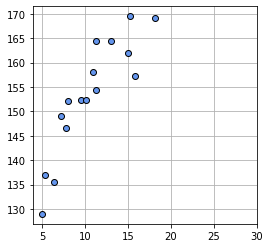

In [5]:
# データの表示
plt.figure(figsize=(4, 4))
plt.plot(
    X, # 入力データ
    T, # 目標データ
    "cornflowerblue", # マーカーを水色にする
    marker="o", # マーカーの形を o にする
    linestyle="None", # マーカーを線で結ばない
    markeredgecolor="black", # マーカーの輪郭を黒にする
)
plt.xlim(X_min, X_max) # x 軸の範囲を指定
plt.grid() # グリッドを表示する
plt.show()

### 5.1.2 直線モデル

直線の式は 
$$
y(x) = w_{0}x + w_1
$$
で表すことができる.

この傾き $w0$ と切片 $w1$ をどのように決めるかを考える.

### 5.1.3 平均二乗誤差

平均二乗誤差は次の式で表すことができる.
$$
J = \frac{1}{N}\sum_{n=0}^{N-1}(y_n - t_n)^2
$$

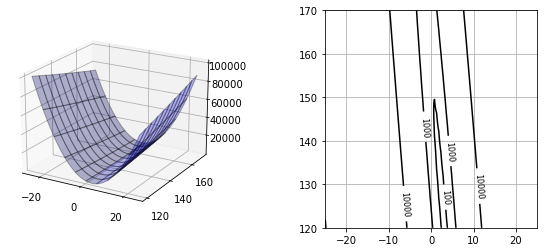

In [6]:
# 平均二乗誤差 (MSE) 関数
def mse_line(x, t, w):
    y = w[0] * x + w[1]
    mse = np.mean((y-t)**2)
    return mse

# 各 w0, w1 で平均二乗誤差 (MSE) を計算
w0_n, w1_n = 100, 100
w0_min, w0_max = -25, 25
w1_min, w1_max = 120, 170
w0 = np.linspace(w0_min, w0_max, w0_n)
w1 = np.linspace(w1_min, w1_max, w1_n)
J = np.zeros((w1_n, w0_n))

# グリッド状の点 (w0, w1) に対して J を計算
for i0 in range(w0_n):
    for i1 in range(w1_n):
        w = np.array([w0[i0], w1[i1]])
        J[i1, i0] = mse_line(X, T, w)
ww0, ww1 = np.meshgrid(w0, w1)

# グラフ描画
plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

# サーフェス表示
ax = plt.subplot(1, 2, 1, projection="3d")
ax.plot_surface(
    ww0, ww1, J,
    rstride=10, cstride=10, alpha = 0.3, color="blue", edgecolor = "black", 
)
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

# 等高線表示
plt.subplot(1, 2, 2)
cont = plt.contour(
    ww0, ww1, J, colors = "black", 
    levels = [100, 1000, 10000, 100000],
)
cont.clabel(fmt="%d", fontsize=8)
plt.grid()
plt.show()

### 5.1.4 パラメータを求める (勾配法)

$J$ が最も小さくなる $w_0$, $w_1$ を求める最も単純で基本的な方法は勾配法 (最急降下法, steepest descent method) です.

In [7]:
# 平均二条誤差 (MSE) の勾配
def dmse_line(x, t, w):
    y = w[0] * x + w[1]
    d_w0 = 2 * np.mean((y - t) * x)
    d_w1 = 2 * np.mean(y -t)
    return d_w0, d_w1

試しに w = np.array([10, 165]) での勾配を求めてみる

In [8]:
w = np.array([10, 165])
d_w = dmse_line(X, T, w)
print(np.round(d_w, 2))

[2736.66  236.46]


繰り返し回数 19624
w0 = 2.609076, w1 = 125.566337
dMSE = [-0.008312, 0.099998]
MSE = 28.912964
SD = 5.377078 cm


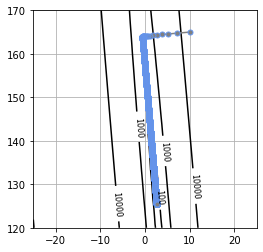

In [9]:
# 勾配法
def fit_line_num(x, t, w_init):
    # パラメータ
    alpha = 0.001
    tau_max = 100000
    eps = 0.1
    
    # 勾配法
    w = np.zeros((tau_max + 1, 2))
    w[0, :] = w_init
    for tau in range(tau_max):
        dmse = dmse_line(x, t, w[tau, :])
        w[tau + 1, 0] = w[tau, 0] - alpha * dmse[0]
        w[tau + 1, 1] = w[tau, 1] - alpha * dmse[1]
        if max (np.absolute(dmse)) < eps:
            break
    w_final = w[tau + 1, :]
    w_hist = w[: tau + 2, :]
    return w_final, dmse, w_hist

# メイン
# 勾配法で w を計算
w_init = np.array([10.0, 165.0])
w, dmse, w_history = fit_line_num(X, T, w_init)
mse = mse_line(X, T, w)

# 結果表示
print(f"繰り返し回数 {w_history.shape[0]-1}")
print(f"w0 = {w[0]:.6f}, w1 = {w[1]:.6f}")
print(f"dMSE = [{dmse[0]:.6f}, {dmse[1]:.6f}]")
print(f"MSE = {mse:.6f}")
print(f"SD = {np.sqrt(mse):.6f} cm")

# グラフ描画
plt.figure(figsize=(4, 4))
# 等高線表示
cont = plt.contour(
    ww0, ww1, J,
    colors = "black", levels = [100, 1000, 10000, 100000],
)

cont.clabel(fmt = "%1.0f", fontsize = 8)
# 等高線の上に, 過去のすべての w をプロット
plt.plot(
    w_history[:, 0], w_history[:, 1], "grey",
    marker = ".", 
    markersize = 10, 
    markeredgecolor = "cornflowerblue", 
)
plt.grid()
plt.show()

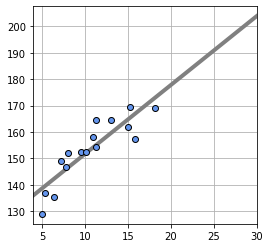

In [10]:
# 線の表示
def show_line(w):
    x = np.linspace(X_min, X_max, 100)
    y = w[0] * x + w[1]
    plt.plot(x, y, "grey", linewidth = 4)
    
# メイン
# グラフ描画
plt.figure(figsize=(4, 4))
show_line(w)
plt.plot(
    X, T, "cornflowerblue", 
    marker = "o", linestyle = "None", markeredgecolor = "black", 
)
plt.xlim(X_min, X_max)
plt.grid()
plt.show()

### 5.1.5 直線モデルパラメータの解析解

w0 = 2.65, w1 = 125.13
MSE = 28.89
SD = 5.38 cm


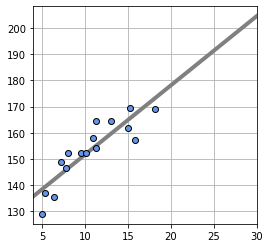

In [11]:
# 解析解
def fit_line(x, t):
    mx = np.mean(x)
    mt = np.mean(t)
    mtx = np.mean(t * x)
    mxx = np.mean(x * x)
    w0 = (mtx - mt * mx) / (mxx - mx ** 2)
    w1 = mt - w0 * mx
    w = np.array([w0, w1])
    return w

# メイン
w = fit_line(X, T)
mse = mse_line(X, T, w)
# 結果表示
print(f"w0 = {w[0]:.2f}, w1 = {w[1]:.2f}")
print(f"MSE = {mse:.2f}")
print(f"SD = {np.sqrt(mse):.2f} cm")

# グラフ描画
plt.figure(figsize=(4, 4))
show_line(w)
plt.plot(
    X, T, "cornflowerblue", 
    marker="o", linestyle = "None", markeredgecolor = "black", 
)
plt.xlim(X_min, X_max)
plt.grid()
plt.show()

## 5.2 ２次元入力の面モデル

### 5.2.1 問題設定

次は, 入力が２次元の場合, $x = (x_0, x_1)$ に拡張する.

先程は年齢のみの入力だったが, 体重の情報を追加する.

まず, 次の式を使って体重のデータを人工的に作る.
$$
体重(kg) = 23 × (\frac{身長(cm)}{100})^2 + noise
$$

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# データのロード
data = np.load("ch5_data.npz")
X0 = data["X"] # これまでの X を X0 とする
N = data["N"]
T = data["T"]

# ２次元データ生成
np.random.seed(seed=1)
X1 = 23 * (T/100) ** 2 + 2 * np.random.randn(N)
X0_min, X0_max = 5, 30
X1_min, X1_max = 40, 75

In [13]:
print(np.round(X0, 2))
print(np.round(X1, 2))
print(np.round(T, 2))

[11.26 15.8   5.    9.53  7.2   6.39  7.79 10.18 10.95 13.08 11.29 15.28
  8.07 18.17  5.41 15.06]
[65.47 55.6  37.21 51.29 52.76 37.61 52.91 51.9  58.12 61.69 57.68 61.95
 52.56 65.05 45.44 58.12]
[164.48 157.18 128.99 152.42 148.95 135.48 146.59 152.4  158.09 164.44
 154.3  169.49 152.09 169.16 137.01 161.95]


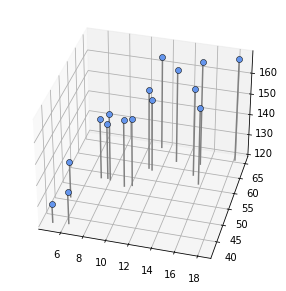

In [14]:
# ２次元データの表示
def show_data2d(ax, x0, x1, t): # ax は 3d グラフ描画のため
    for i in range(len(x0)):
        ax.plot(
            [x0[i], x0[i]],
            [x1[i], x1[i]],
            [120, t[i]],
            color = "gray",
        )
    ax.plot(
        x0,
        x1, 
        t,
        "cornflowerblue",
        marker="o",
        linestyle = "None",
        markeredgecolor = "black", 
        markersize = 6,
        markeredgewidth = 0.5,
    )
    ax.view_init(elev=35, azim = -75)
    
# メイン
plt.figure(figsize=(6,5))
ax = plt.subplot(projection = "3d")
show_data2d(ax, X0, X1, T)
plt.show()

### 5.2.2 データの表し方

データ番号 $n$, 要素番号 $m$ (0 = 年齢, 1 = 体重など) を $x_{n,m}$ と右下の添字として表す. 

### 5.2.3 面モデル

SD = 7.44 cm


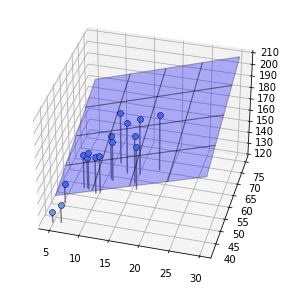

In [15]:
# 面の表示
def show_plane(ax, w):
    # 表示データの計算
    x0_n, x1_n = 5, 5
    x0 = np.linspace(X0_min, X0_max, x0_n)
    x1 = np.linspace(X1_min, X1_max, x1_n)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = w[0] * xx0 + w[1] * xx1 + w[2]
    # サーフェスの表示
    ax.plot_surface(
        xx0, xx1, y,
        rstride=1, cstride=1, alpha=0.3, color="blue", edgecolor="black",
    )
    
# 面の平均二乗誤差 (MSE) 関数
def mse_plane(x0, x1, t, w):
    y = w[0] * x0 + w[1] * x1 + w[2]
    mse = np.mean((y - t) ** 2)
    return mse

# メイン
w = np.array([1.5, 1, 90])
mse = mse_plane(X0, X1, T, w)
# 結果表示
print(f"SD = {np.sqrt(mse):.2f} cm")
# グラフ描画
plt.figure(figsize=(6, 5))
ax = plt.subplot(projection="3d")
show_plane(ax, w)
show_data2d(ax, X0, X1, T)
plt.show()

この面の関数は次の式で表すことができる
$$
y(x) = w_0x_0 + w_1x_1 +w_2
$$

### 5.2.4 面モデルパラメータの解析解

w0 = 0.98, w1 = 0.98, w2 = 89.66
SD = 2.32 cm


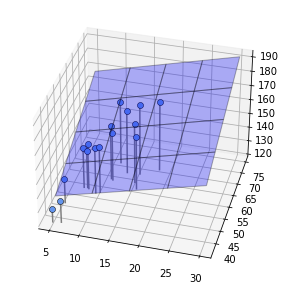

In [16]:
# 解析解
def fit_plane(x0, x1, t):
    c_tx0 = np.mean(t * x0) - np.mean(t) * np.mean(x0)
    c_tx1 = np.mean(t * x1) - np.mean(t) * np.mean(x1)
    c_x0x1 = np.mean(x0 * x1) - np.mean(x0) * np.mean(x1)
    v_x0 = np.var(x0)
    v_x1 = np.var(x1)
    
    # 式 5-34
    w0 = (c_tx1 * c_x0x1 - v_x1 * c_tx0) / (c_x0x1 ** 2 - v_x0 * v_x1)
    
    # 式 5-35
    w1 = (c_tx0 * c_x0x1 - v_x0 * c_tx1) / (c_x0x1 ** 2 - v_x0 * v_x1)
    
    # 式 5-36
    w2 = -w0 * np.mean(x0) - w1 * np.mean(x1) + np.mean(t)
    w = np.array([w0, w1, w2])
    return w

# メイン
w = fit_plane(X0, X1, T)
mse = mse_plane(X0, X1, T, w)
# 結果表示
print(f"w0 = {w[0]:.2f}, w1 = {w[1]:.2f}, w2 = {w[2]:.2f}")
print(f"SD = {np.sqrt(mse):.2f} cm")

# グラフ描画
plt.figure(figsize=(6, 5))
ax = plt.subplot(projection="3d")
show_plane(ax, w)
show_data2d(ax, X0, X1, T)
plt.show()

## D 次元線形回帰モデル

### 5.3.1 D 次元線形回帰モデル

１次元入力で扱った直線モデル, ２次元入力で扱った面モデルはまとめて線型回帰モデルと呼ぶ.

一般的には次のような式で表す

$$
y(x) = w_0x_0 + w_1x_1 + \dots + w_{D-1}x_{D-1} + w_D
$$

### 5.3.2 パラメータの解析解

パラメータの解析解は次の式で求めることができます.
$$
w = (X^TX)^{-1}X^Tt
$$

右辺はムーア・ペンローズの疑似逆行列という名前がついている.

### 5.3.3 原点を通らない面への拡張

原点にしばられない面を表現するには次の式で表すことができます.

$$
y(x) = w_0x_0 + w_1x_1 + w_2x_2 = w_0x_0 + w_1x_1 + w_2
$$

## 5.4 線形基底関数モデル

$x$ が１次元の場合に話を戻す.先程は直線のモデルを使って身長の予測を考えてきたが, 曲線で考えるともっと誤差を小さくすることができるかもしれない.

基底関数とは「もとになる関数」という意味です.

5.3 節で紹介した線形回帰モデルの $x$ を基底関数 $\phi(x)$ に置き換えることで, いろいろな形の関数を作ろうというのが, 線形基底関数モデルの考え方です.

まず, 何を基底関数とするかを選ぶ必要があるのですが, ここではガウス関数を基底関数に選んだ線形基底関数モデルを考えます.

ガウス基底関数は次の式で表します.

$$
\phi_j(x) = exp\biggr\{-\frac{(x-\mu_j)^2}{2s^2}\biggl\}
$$

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# データのロード
data = np.load("ch5_data.npz")
X = data["X"]
X_min = 0
X_max = data["X_max"]
N = data["N"]
T = data["T"]

In [18]:
# ガウス関数
def gauss(x, mu, s):
    y = np.exp(-((x - mu) ** 2) / (2 * s ** 2))
    return y

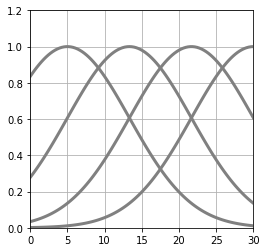

In [19]:
# メイン
M = 4
mu = np.linspace(5, 30, M)
s = mu[1] - mu[0]
xb = np.linspace(X_min, X_max, 100)
y = np.zeros((M, 100))
for j in range(M):
    y[j, :] = gauss(xb, mu[j], s)
    
# グラフ描画
plt.figure(figsize=(4, 4))
for j in range(M):
    plt.plot(xb, y[j, :], "gray", linewidth=3)
plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)
plt.grid()
plt.show()

In [20]:
# 線形基底関数モデル
def gauss_func(w, x):
    m  = len(w) - 1
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    # x と同じサイズで要素が 0 の ndarray 型を作成
    y = np.zeros_like(x)
    # ここでは式 5-66 ではなく式 5-65 で実装
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)
    y = y + w[m]
    return y

In [21]:
# 線形基底関数モデルの平均二乗誤差 (MSE)
def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = np.mean((y - t) ** 2)
    return mse

In [22]:
# 線形基底関数モデルの厳密解
def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    # 式 5-69 の計画行列 phi を作成
    phi = np.ones((n, m + 1))
    for j in range(m):
        phi[:, j] = gauss(x, mu[j], s)
    # 式 5-68 で厳密解の w を計算
    w = np.linalg.inv(phi.T @ phi) @phi.T @ t
    return w

w =  [ 49.64  96.27 -26.15 198.24  24.31]
SD = 3.82 cm


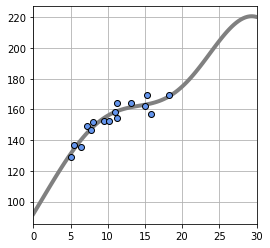

In [23]:
# ガウス基底関数表示
def show_gauss_func(w):
    x = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, x)
    plt.plot(x, y, "gray", linewidth = 4)
    
    
# メイン
M = 4
w = fit_gauss_func(X, T, M)
mse = mse_gauss_func(X, T, w)
# 結果表示
print("w = ", np.round(w, 2))
print(f"SD = {np.sqrt(mse):.2f} cm")

# グラフ描画
plt.figure(figsize=(4,4))
show_gauss_func(w)
plt.plot(
    X, T, "cornflowerblue", 
    marker="o", linestyle="None", markeredgecolor="black",
)
plt.xlim(X_min, X_max)
plt.grid()
plt.show()

## 5.5 オーバーフィティングの問題

基底関数の $M$ はどうやって決めるのか?

$M$ を十分に大きくすればどんなデータどもうまくフィッティングできるのでしょうか?

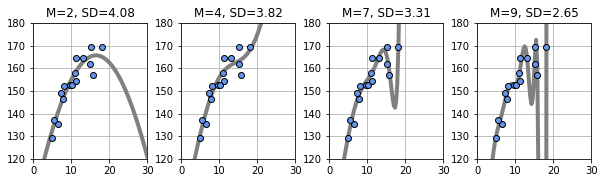

In [24]:
M = [2, 4, 7, 9]
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    w = fit_gauss_func(X, T, M[i])
    mse = mse_gauss_func(X, T, w)
    # グラフ描画
    show_gauss_func(w)
    plt.plot(
        X, T, "cornflowerblue",
        marker="o", linestyle="None", markeredgecolor="black",
    )
    plt.title(f"M={M[i]:d}, SD={np.sqrt(mse):.2f}")
    plt.xlim(X_min, X_max)
    plt.ylim(120, 180)
    plt.grid()
    
plt.show()

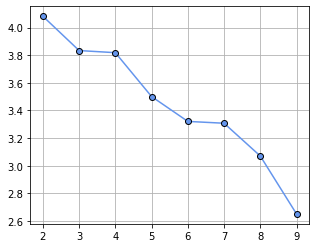

In [25]:
# メイン
M= range(2, 10)
sd = np.zeros(len(M))
for i in range(len(M)):
    w = fit_gauss_func(X, T, M[i])
    sd[i] = np.sqrt(mse_gauss_func(X, T, w))
    
# グラフ描画
plt.figure(figsize=(5, 4))
plt.plot(M, sd, "cornflowerblue", marker="o", markeredgecolor="black")
plt.grid()
plt.show()

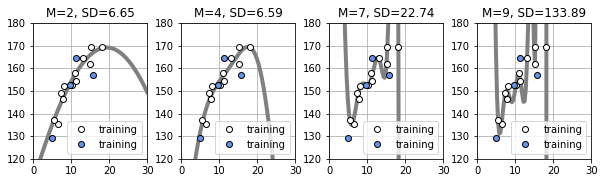

In [26]:
# 訓練データとテストデータに分割
split = int(N/4)
X_test = X[:split]
T_test = T[:split]
X_train = X[split:]
T_train = T[split:]

# メイン
M = [2, 4, 7, 9]
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
for i in range(len(M)):
    w = fit_gauss_func(X_train, T_train, M[i])
    sd = np.sqrt(mse_gauss_func(X_test, T_test, w))
    # グラフ描画
    plt.subplot(1, len(M), i+1)
    show_gauss_func(w)
    plt.plot(
        X_train, T_train, "white", 
        marker="o", linestyle="None", markeredgecolor="black",
        label="training",
    )
    plt.plot(
        X_test, T_test, "cornflowerblue", 
        marker="o", linestyle="None", markeredgecolor="black",
        label="training",
    )
    plt.title(f"M={M[i]:d}, SD={sd:.2f}")
    plt.legend(loc="lower right", fontsize=10, numpoints=1)
    plt.xlim(X_min, X_max)
    plt.ylim(120, 180)
    plt.grid()

plt.show()

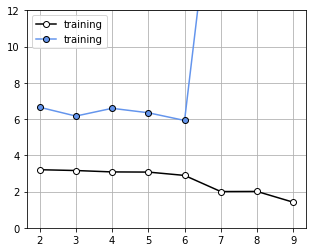

In [27]:
# メイン
M = range(2, 10)
sd_train = np.zeros(len(M))
sd_test = np.zeros(len(M))
for i in range(len(M)):
    # w を計算
    w = fit_gauss_func(X_train, T_train, M[i])
    # 訓練データの SD を計算
    sd_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, w))
    # テストテータの SD を計算
    sd_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, w))
    
# グラフ描画
plt.figure(figsize=(5,4))
plt.plot(
    M, sd_train, "black",
    marker="o", linestyle="-",
    markerfacecolor="white", markeredgecolor="black",
    label="training",
)
plt.plot(
    M, sd_test, "cornflowerblue",
    marker="o", linestyle="-",
    markeredgecolor="black",
    label="training",
)
plt.legend(loc="upper left", fontsize=10)
plt.ylim(0, 12)
plt.grid()
plt.show()

In [28]:
# K 分割交差検証
def kfold_gauss_func(x, t, m, k):
    n = x.shape[0]
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        # 訓練データとテストデータに分割
        # (A) テストデータのインデックス
        i_test = np.fmod(range(n), k)
        x_test = x[i_test ==i]
        t_test = t[i_test == i]
        x_train = x[i_test != i]
        t_train = t[i_test != i]
        # w を訓練データで決める
        w = fit_gauss_func(x_train, t_train, m)
        # 訓練データの MSE を計算
        mse_train[i] = mse_gauss_func(x_train, t_train, w)
        # テストデータの MSE を計算
        mse_test[i] = mse_gauss_func(x_test, t_test, w)
    return mse_train, mse_test

In [29]:
np.fmod(range(10), 5)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4], dtype=int32)

In [30]:
M = 4
K = 4
kfold_gauss_func(X, T, M, K)

(array([11.67192713,  9.95121926, 15.74669854, 11.40405857]),
 array([ 37.77871725, 824.07674518,  14.32643196,  45.55112846]))

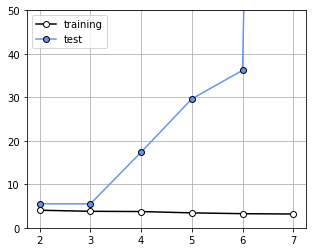

In [31]:
# メイン
M = range(2, 8)
K = 16
Cv_Gauss_train = np.zeros((K, len(M)))
Cv_Gauss_test = np.zeros((K, len(M)))
for i in range(0, len(M)):
    Cv_Gauss_train[:, i], Cv_Gauss_test[:, i] = kfold_gauss_func(X, T, M[i], K)

# 訓練データの各分割における MSE の平均, の平方根
sd_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis=0))
# テストデータの各分割における MSE の平均, の平方根
sd_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis=0))
np.save("ch5_Gauss_test.npy", sd_Gauss_test)

# グラフ描画
plt.figure(figsize=(5,4))
# 訓練データに対する MSE のグラフ
plt.plot(
    M, sd_Gauss_train, "black", 
    marker="o", linestyle="-",
    markerfacecolor="white", markeredgecolor="black",
    label="training",
)
# テストデータに対する MSE のグラフ
plt.plot(
    M, sd_Gauss_test, "cornflowerblue", 
    marker="o", linestyle="-", 
    markeredgecolor="black", 
    label="test", 
)
plt.legend(loc="upper left", fontsize=10)
plt.ylim(0, 50)
plt.grid()
plt.show()

SD = 3.83 cm


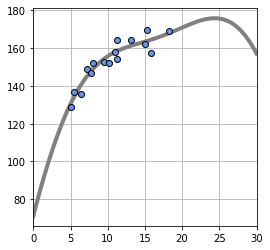

In [32]:
# メイン
M = 3
w = fit_gauss_func(X, T, M)
sd = np.sqrt(mse_gauss_func(X, T, w))
# 結果表示
print(f"SD = {sd:.2f} cm")

# グラフ描画
plt.figure(figsize=(4, 4))
show_gauss_func(w)
plt.plot(
    X, T, "cornflowerblue", 
    marker="o", linestyle="None", markeredgecolor="black",
)
plt.xlim(X_min, X_max)
plt.grid()
plt.show()

## 5.6 新しいモデルの生成

線形基底関数モデルを導入して, データとの誤差もかなり改善しました.

しかし, このグラフにはまだ問題点があります. 25 歳のところから急激に下がっている点です.

これは 30 歳付近のデータが不十分であったために起こってしまったことです.

解決策としては, この知識にあったモデルを作ることです.

年齢 $x$ が大きくなるにつれて身長は徐々に増加し, 最終的にはある一定の値で収束するような関数は,

例えば, 次の式で表すことができます.

$$
y(x) = w_0 - w_1exp(-w_2x)
$$

w0, w1, w2 はすべて正の値をとるパラメータです.

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# データのロード
data = np.load("ch5_data.npz")
X = data["X"]
X_min = 0
X_max = data["X_max"]
N = data["N"]
T = data["T"]

# モデル A
def model_A(x, w):
    y = w[0] - w[1] * np.exp(-w[2] * x)
    return y

# モデル A の表示
def show_model_A(w):
    x = np.linspace(X_min, X_max, 100)
    y = model_A(x, w)
    plt.plot(x, y, "gray", linewidth = 4)
    
# モデル A の平均二乗誤差 (MSE)
def mse_model_A(w, x, t):
    y = model_A(x, w)
    mse = np.mean((y - t) ** 2)
    return mse

In [89]:
from scipy.optimize import minimize
# モデル A のパラメータ最適化
def fit_model_A(w_init, x, t):
    res = minimize(mse_model_A, w_init, args=(x, t), method="powell")
    return res.x

w0 = 168.57, w1 = 110.15, w2 = 0.21
SD = 3.87 cm


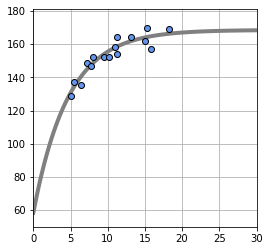

In [107]:
# メイン
w_init = np.array([50.0, 0.0, 0.0])
w = fit_model_A(w_init, X, T)
sd = np.sqrt(mse_model_A(w, X, T))
# 結果表示
print(f"w0 = {w[0]:.2f}, w1 = {w[1]:.2f}, w2 = {w[2]:.2f}")
print(f"SD = {sd:.2f} cm")

# グラフ描画
plt.figure(figsize=(4,4))
show_model_A(w)
plt.plot(
    X, T, "cornflowerblue", 
    marker="o", linestyle="None", markeredgecolor="black",
)
plt.xlim(X_min, X_max)
plt.ylim(50, 181)
plt.grid()
plt.show()

## 5.7 モデルの選択

前節では, 新しいモデルを作ってパラメータを最適化しデータにフィッティングすることができました.

しかし, 前節で説明したモデルよりもよさそうなモデルを思いついた時, 
どちらのモデルがよりのかをどのようにして判断すればよいのか,

つまりモデル間の比較はどのようにすべきかをこの節で説明する.

Gauss(M=3) SD = 5.49 cm
Model A SD = 4.70 cm


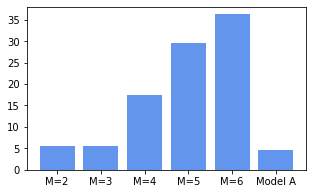

In [36]:
# 交差検証 モデル A
def kfold_model_A(x, t, k):
    n = len(x)
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        # 訓練データとテストデータに分割
        i_test = np.fmod(range(n), k)
        x_test = x[i_test == i]
        t_test = t[i_test == i]
        x_train = x[i_test != i]
        t_train = t[i_test != i]
        # 精度を上げるため
        w_init = np.array([169.04, 113.66, 0.22])
        w = fit_model_A(w_init, x_train, t_train)
        mse_train[i] = mse_model_A(w, x_train, t_train)
        mse_test[i] = mse_model_A(w, x_test, t_test)
    return mse_train, mse_test

# メイン
# model A の交差検定
K = 16
Cv_A_train, Cv_A_test = kfold_model_A(X, T, K)
sd_A_test = np.sqrt(np.mean(Cv_A_test))
# 線形基底関数モデルの交差検定の結果のロード
sd_Gauss_test = np.load("ch5_Gauss_test.npy")
# 結果のまとめ
SDs = np.append(sd_Gauss_test[0:5], sd_A_test)
# 結果表示
print(f"Gauss(M=3) SD = {sd_Gauss_test[1]:.2f} cm")
print(f"Model A SD = {sd_A_test:.2f} cm")

# グラフ描画
M = range(6)
label = ["M=2", "M=3", "M=4", "M=5", "M=6", "Model A"]

plt.figure(figsize=(5, 3))
plt.bar(
    M, SDs, facecolor="cornflowerblue", align="center", 
    tick_label=label,
)
plt.show()

M = 2 ... 6 は線形基底関数モデル

## 5.8 まとめ

第 5 章では教師あり学習の回帰問題の解き方を一通り解説しました.

非常に重要なので予測モデルを作成するまでの流れを最後にまとめます.

1. 入力変数と目的変数のデータがあります.
2. 何をもってして予測の精度をよしとするかという目的関数を決めます.
3. モデルの候補を考えます.
4. ホールドアウト検証をすることを想定するならば, データはテストデータと訓練データに分けておきます.
5. 訓練データを使って, 目的関数が最小 (または最大) となるようにそれぞれのモデルのパラメータ $w^*$ を決定します.
6. このモデルパラメータを用いて, テストデータの入力データ $X$ から目標データ $t$ の予測を行い, 最も誤差の少ないモデルを選びます.
7. モデルが決まったら, 手持ちのデータをすべて使い, モデルパラメータを最適化します. この最適化されたモデルが未知の入力に対して最有力の予測モデルとなるのです.